Import Data
---

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

df = pd.read_csv("CleanDataBase.csv")
df.head()

,Lab,ID,GroupNum,Height,Weight,Age,Male,RightLeg_Dom,RightLeg_Fast,AdaptationDurationMins,...,Stroke,TextSpeedRatio,EventDetection,DomFast,BMI,Young,TMSteadyGood,TMAfterGood,DeltaAda,DeltaAdaGood
0,SML,B001,1.0,160.0,60.9,20.0,0,1,1,NaN,...,0,2.0,NaN,1,23.789062,1,1,1,0.291812,1
1,SML,B003,1.0,174.0,68.0,20.0,0,1,1,NaN,...,0,2.0,NaN,1,22.460034,1,1,1,0.220894,1
2,SML,B004,1.0,159.0,59.2,20.0,1,1,1,NaN,...,0,2.0,NaN,1,23.416795,1,0,1,0.198431,1
3,SML,BC001,1.0,160.0,60.9,20.0,0,1,1,NaN,...,0,2.0,NaN,1,23.789062,1,1,1,0.220999,1
4,SML,BC004,1.0,165.0,65.0,20.0,1,1,1,NaN,...,0,2.0,NaN,1,23.875115,1,0,1,0.355004,1


In [2]:
df.shape

(536, 38)

In [3]:
# set random seed to increase repeatability
import numpy as np
RSEED=50
np.random.seed(RSEED)

Potential Features and Targets
---

In [25]:
from patsy import dmatrices

Y, X = dmatrices('TMAfter ~ C(SpeedRatio) + SpeedDifference + MidSpeed+ C(Abrupt) + TMBase + \
               AdaptationDuration + Age + C(Young) + Height + Weight + BMI + C(IsCatch) + C(Stroke)', df, return_type="dataframe")

feature_cols = ['C(SpeedRatio)[T.3.0]', 'SpeedDifference', 'MidSpeed', 'C(Abrupt)[T.1]', 'TMBase', \
               'AdaptationDuration', 'Age', 'C(Young)[T.1]', 'Height', 'Weight', 'BMI', 'C(IsCatch)[T.1]', 'C(Stroke)[T.1]']

target_cols = ["TMAfter"]



from patsy import dmatrices

Y, X = dmatrices('DeltaAda ~ C(SpeedRatio) + SpeedDifference + MidSpeed+ C(Abrupt) + MidBase + \
               AdaptationDuration + Age + C(Young) + Height + Weight + BMI + C(IsCatch) + C(Stroke)', df, return_type="dataframe")

feature_cols = ['C(SpeedRatio)[T.3.0]', 'SpeedDifference', 'MidSpeed', 'C(Abrupt)[T.1]', 'MidBase', \
               'AdaptationDuration', 'Age', 'C(Young)[T.1]', 'Height', 'Weight', 'BMI', 'C(IsCatch)[T.1]', 'C(Stroke)[T.1]']

target_cols = ["DeltaAda"]



In [26]:
df_Interactions = pd.concat([X,Y], axis=1)

Features = df_Interactions[feature_cols]
Target = df_Interactions[target_cols]

Split the Data into Training and Testing Sets
---

In [27]:
# Split data into training and testing set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(Features,Target,test_size=0.2, random_state = RSEED)

y_test=y_test.values.ravel()
y_train=y_train.values.ravel()

Many Regression Algorithms
---

- Linear Regression/GLM
- SVR, GPR
- Ensemble Methods
- Decision Tree
- Nural Networks

In [32]:
from sklearn.linear_model import LinearRegression, LassoLars, BayesianRidge, ElasticNet, Lars
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

rmdls = {'LR':  LinearRegression(),
        'LLL':   LassoLars(alpha=.1),
         'LL':   Lars(),
        'LBR':  BayesianRidge(),
        'LEN':  ElasticNet(),
        'GP':   GaussianProcessRegressor(),
        'DT':   DecisionTreeRegressor(max_depth = 5, random_state=0),
        'RF':   RandomForestRegressor(max_depth = 5, random_state=0),
        'NN':   MLPRegressor(random_state=1, max_iter=500)}

#        'LTR':  TweedieRegressor(power=1, alpha=0.5, link='log'),

In [33]:
sel_rmdls = [ 'LR', 'LLL', 'LBR', 'LEN', 'GP','DT','RF', 'NN']

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Root Mean Squared Error: 0.19478002521410276
Root Mean Squared Error % Mean: 121.11193232436439
LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)
Root Mean Squared Error: 0.17456907812998798
Root Mean Squared Error % Mean: 108.5450027700017
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
Root Mean Squared Error: 0.17583714110560789
Root Mean Squared Error % Mean: 109.33346943704056
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None,

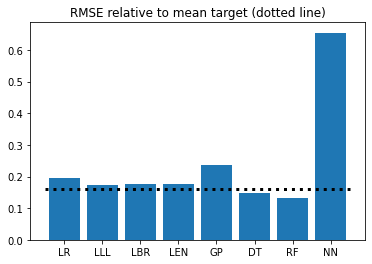

In [34]:
import numpy as np
from sklearn import metrics

RMSE = {}

for rmdlNM in sel_rmdls:
    rmdl = rmdls[rmdlNM]
    print(rmdl)
    rmdl.fit( X_train, y_train )
    predicted  = rmdl.predict(X_test)
    expected = np.array(y_test)
    
    #print('Mean Absolute Error:', metrics.mean_absolute_error(expected, predicted))  
    #print('Mean Squared Error:', metrics.mean_squared_error(expected, predicted))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(expected, predicted)))
    print('Root Mean Squared Error % Mean:', 100*(np.sqrt(metrics.mean_squared_error(expected, predicted))/np.mean(expected)))

    RMSE[rmdlNM] = np.sqrt(metrics.mean_squared_error(expected, predicted))

plt.bar(range(len(RMSE)), list(RMSE.values()), align='center')
plt.xticks(range(len(RMSE)), list(RMSE.keys()))
plt.plot([0-.5, len(RMSE)-.5], [np.mean(expected), np.mean(expected)], linestyle=':', color='black', linewidth=3)
plt.title('RMSE relative to mean target (dotted line)')
plt.show()

Summary
---

In summary, regression models are not able to predict gait training sucuess very well.